In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler


In [ ]:
def load_dataset(x_file, y_file):
    with open(x_file, 'r') as file:
        lines = file.readlines()
        cleaned_lines = [line.strip() for line in lines if line.strip()]
    X = np.array([np.fromstring(line, sep=' ') for line in cleaned_lines])
    y = np.loadtxt(y_file)
    return X, y

# Load the datasets
X_test, y_test = load_dataset('UCI HAR Dataset/test/X_test.txt', 'UCI HAR Dataset/test/y_test.txt')
X_train, y_train = load_dataset('UCI HAR Dataset/train/X_train.txt', 'UCI HAR Dataset/train/y_train.txt')
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))


# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# K-Means Clustering

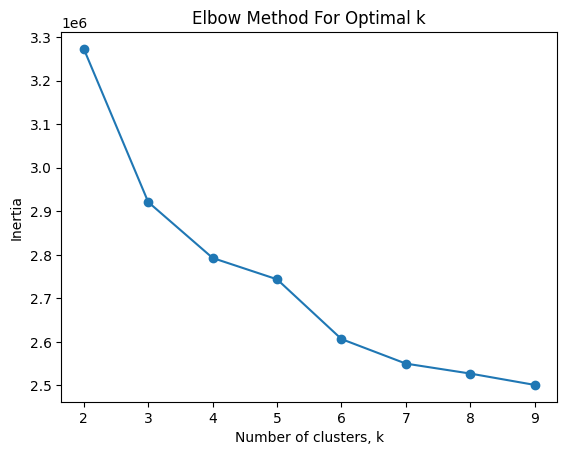

In [ ]:
# Elbow Method to find the optimal number of clusters
inertia = []
k_values = range(2, 10)  # Adjust based on your dataset and initial analysis
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to visually inspect the best k
plt.plot(k_values, inertia, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Choose an optimal k based on the elbow method and apply K-Means
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)

# DBSCAN Clustering

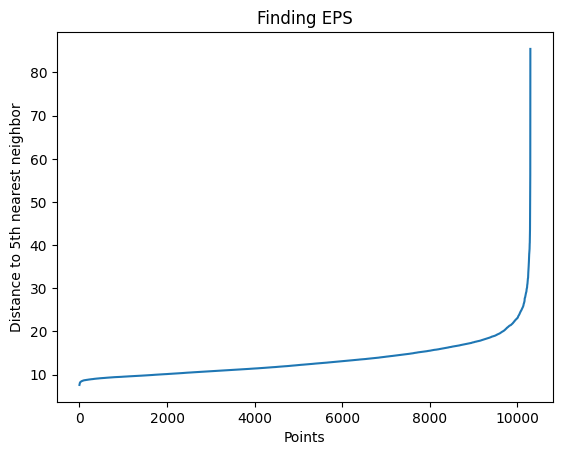

In [ ]:
# Use NearestNeighbors to find a suitable eps
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(scaled_features)
distances, indices = neighbors.kneighbors(scaled_features)

# Sort distances
distances = np.sort(distances[:, -1])

# Plot the distances to see where there's an "elbow"
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('Finding EPS')
plt.show()


This plot can help you visually identify a good value for eps. Look for the point where the curve starts to bend ("elbow" point). This distance indicate a good starting value for eps.

In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=24, min_samples=50)
dbscan_clusters = dbscan.fit_predict(scaled_features)

# Evaluate clustering (optional)
print(f"Silhouette Score for K-Means: {silhouette_score(scaled_features, kmeans_clusters)}")
print(f"Silhouette Score for DBSCAN: {silhouette_score(scaled_features, dbscan_clusters)}")


Silhouette Score for K-Means: 0.3165174060752722
Silhouette Score for DBSCAN: 0.4582103404687107


# Visualize the clusters

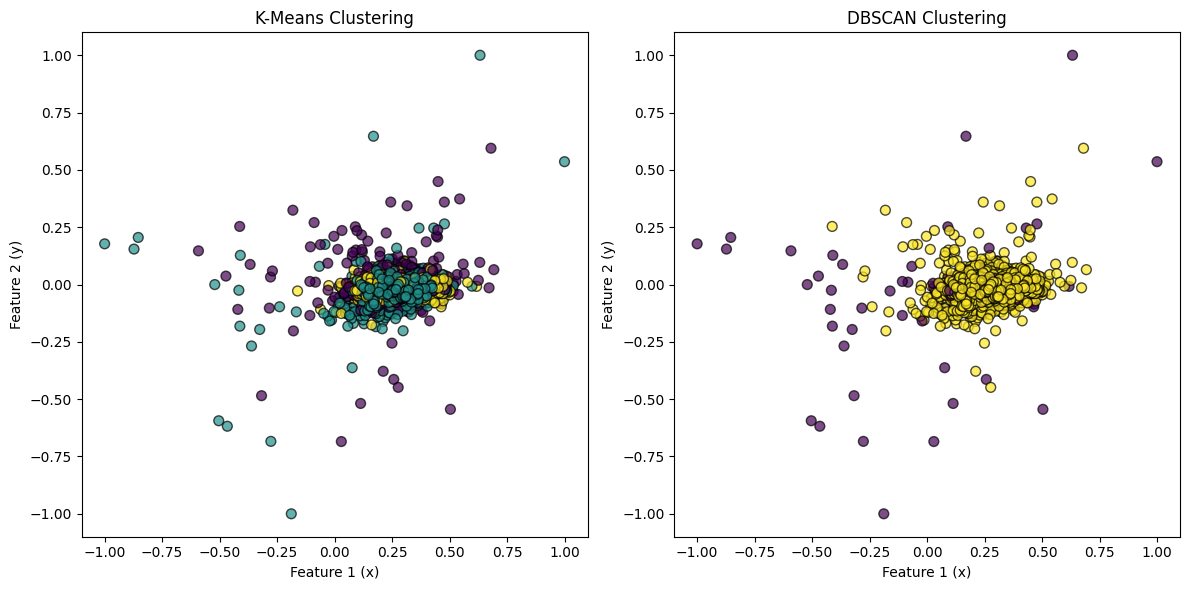

In [ ]:
# Assuming X is your dataset and it's already scaled or normalized if needed
# X[:, 0] would be your 'x' values and X[:, 1] would be your 'y' values

# Visualization for K-Means Clustering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1 (x)')
plt.ylabel('Feature 2 (y)')

# Visualization for DBSCAN Clustering
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(X[:, 0], X[:, 1], c=dbscan_clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (x)')
plt.ylabel('Feature 2 (y)')

plt.tight_layout()
plt.show()
